# Домашняя работа №5.
В этом домашнем задании предстоит поработать с достаточно небольшим, но интересным датасетом по раку груди.
Признаками в этом наборе данных являются различные измерения образований в груди, такие как радиус, симметричность, и т.д.
Целевая переменная - диагноз, является ли новообразование злокачественным или нет.

Датасет скачан по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data .

<b>Описание/Пошаговая инструкция выполнения домашнего задания:</b>
<ol style="list-style-type: disc;"><b>Часть 1. EDA</b>
    <li>Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data</li>
    <li>Посмотрите на базовые статистики датасета: средние, медианы, и т.д.</li>
    <li>Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.</li>
    <li>Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?</li>
    <li>Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?</li>
    <li>Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.</li>
    <li>Также очень приветствуется ваша инициатива по визуализациям и исследовании данных :)</li>
</ol>
<ol style="list-style-type: disc;"><b>Часть 2. Моделирование при помощи kNN</b>
    <li>Разбейте данные на train-test, отложив 30% выборки для тестирования.</li>
    <li>Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.</li>
    <li>Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.</li>
    <li>Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)</li>
</ol>

# Часть 1. EDA

1. Импортируем основные библиотеки:

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2. Считываем данные из CSV-файла. Выводим первые пять строк, чтобы убедиться, что данные считались с локального файла:

In [37]:
df = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


3. В датасете присутствует ненужный столбец "Unnamed: 32" (обычно появляется в данных из-за наличия лишнего столбца с пустыми значениями в файле CSV).
Удалю его и посмотрю на полный список доступных признаков.
Так же удаляем столбец "id", т.к. он не несёт никакой полезной нагрузки.

In [38]:
df.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1 )

In [39]:
df.columns.tolist()

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

4. Как мы видим, их довольно много. Сколько?

In [40]:
df.shape

(569, 31)

569 Строчек и 32 столбца (считая идентификатор).

5. Приведём описание признаков:
*  <b>Признак 2: </b> <b>diagnosis</b> - Диагноз (М = злокачественный, В = доброкачественный).

    Для последующих признаков 3-32: для каждого ядра клетки вычисляются десять вещественных признаков:
    * а) радиус (среднее значение расстояний от центра до точек периметра)
    * б) текстура (стандартное отклонение значений шкалы серого)
    * в) периметр
    * г) площадь
    * д) гладкость (локальное изменение длины радиусов)
    * е) компактность (периметр^2/площадь - 1,0)
    * ж) вогнутость (выраженность вогнутых участков контура)
    * з) вогнутые точки (количество вогнутых участков контура)
    * и) симметрия
    * к) фрактальная размерность («приближение береговой линии» - 1).
<p></p>
    
*  <b>Признаки 3-32: </b> <b>radius_mean</b> - средний радиус,
<b>texture_mean</b> - средняя текстура,
<b>perimeter_mean</b> - средний периметр,
<b>area_mean</b> - средняя площадь,
<b>smoothness_mean</b> - средняя гладкость,
<b>compactness_mean</b> - средняя компактность,
<b>concavity_mean</b> - средняя вогнутость,
<b>concave points_mean</b> - средние вогнутые точки,
<b>symmetry_mean</b> - среднее значение симметрии,
<b>fractal_dimension_mean</b> - среднее фрактальное измерение,
<b>radius_se</b> - радиус se,
<b>texture_se</b> - текстура se,
<b>perimeter_se</b> - периметр se,
<b>area_se</b> - область se,
<b>smoothness_se</b> - гладкость se,
<b>compactness_se</b> - компактность se,
<b>concavity_se</b> - вогнутость se,
<b>concave points_se</b> - вогнутые точки se,
<b>symmetry_se</b> - симметрия se,
<b>fractal_dimension_se</b> - фрактальное измерение se,
<b>radius_worst</b> - худший радиус,
<b>texture_worst</b> - худшая текстура,
<b>perimeter_worst</b> - худший периметр,
<b>area_worst</b> - худший район,
<b>smoothness_worst</b> - худшая гладкость,
<b>compactness_worst</b> - худшая компактность,
<b>concavity_worst</b> - худшая вогнутость,
<b>concave points_worst</b> - худшие вогнутые точки,
<b>symmetry_worst</b> - худшая симметрия,
<b>fractal_dimension_worst</b> - худшее фрактальное измерение.

6. Теперь давайте посмотрим, какого типа эти данные и узнаем количество пропущенных значений:

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Видим, что пропущенные значения отсутствуют, поэтому бороться с ними не требуется.

7. <b>"diagnosis"</b> - целевая переменная (зависимая переменная).
Чтобы не путаться в понятиях я переименую признак <b>"diagnosis"</b> в <b>"target"</b> (целевая переменная).

In [42]:
df = df.rename(columns = {"diagnosis" : "target"})    
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


8. Посмотрим распеределение целевой переменной.

In [43]:
df["target"].value_counts()

target
B    357
M    212
Name: count, dtype: int64

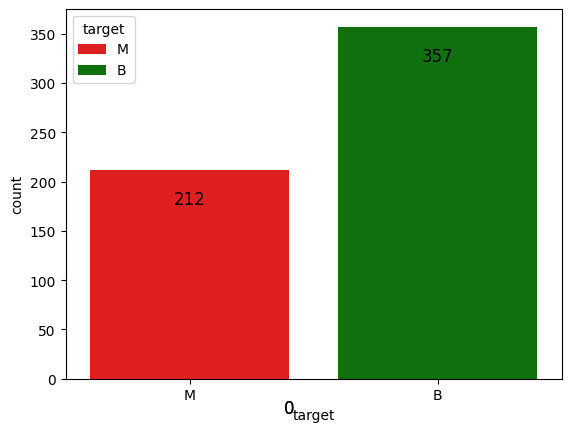

In [44]:
# Создание пользовательской цветовой палитры
custom_palette = ['red', 'green']

# Строим countplot с использованием пользовательской цветовой палитры
ax = sns.countplot(data=df, x="target", palette=custom_palette, hue="target", legend=True)

# Добавление текстовой информации на график
for p in ax.patches:
    ax.annotate(f'\n{round(p.get_height())}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

plt.show()

Видим, что <b>B</b> существенно больше <b>M</b>,
что в дальнейшем потребует от нас соответсвующего распределения данных для выборки данных для обучения и для тестирования.

9. Преобразуем категориальные переменные <b>B</b> и <b>M</b> в  числовые значения,
так как в машинном обучении, особенно в задачах классификации,
требуется преобразование классификатора в числовой формат ввиду ограничений алгоритмов машинного обучения.
Важно учитывать, что многие алгоритмы машинного обучения работают непосредственно с числовыми значениями
и не могут обрабатывать категориальные переменные напрямую.
Такое преобразование позволяет моделям машинного обучения корректно обрабатывать эти данные
и строить прогностические модели на их основе.</br>
"M"=1, "B"=0.

In [45]:
df["target"] = [1 if i.strip() == "M" else 0 for i in df.target]
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


10. Посмотрим на базовые статистики датасета: среднее (mean), стандартное отклонение (std),
    минимальное (min) и максимальное (max) значения, медиану (50%) и значения квантилей:

In [46]:
# Устанавливаем параметр для отображения всех столбцов при вызове describe()
pd.set_option('display.max_columns', None)

# Выводим базовые статистики для всех колонок и транспонируем для удобства просмотра
basic_stats = df.describe().T
basic_stats

,count,mean,std,min,25%,50%,75%,max
target,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


<ol style="list-style-type: disc;">Описание каждого значения, возвращаемого методом .describe():
    <li><b>Count (Количество):</b> Показывает количество наблюдений в каждом столбце. Пропущенные значения не учитываются при подсчете.</li>
    <li><b>Mean (Среднее значение):</b> Это среднее арифметическое всех значений в столбце.</li>
    <li><b>Std (Стандартное отклонение):</b> Это мера разброса или дисперсии значений в столбце. Оно показывает, насколько разбросаны значения относительно среднего значения.</li>
    <li><b>Min (Минимальное значение):</b> Это наименьшее значение в столбце.</li>
    <li><b>25%, 50%, 75% (Квартили):</b> Это значения, которые делят упорядоченное распределение на четыре части. 25% - это значение, которое меньше или равно 25% значений в столбце; 50% - это медиана, которая делит данные на две равные части; 75% - это значение, которое меньше или равно 75% значений в столбце.</li>
    <li><b>Max (Максимальное значение):</b> Это наибольшее значение в столбце.</li>
</ol>

11. Видим, что имеется большой разброс значений, например для </br>
<b>"area_worst"</b> значения от <b>185.2</b> до <b>4254.0</b>,</br>
а для <b>"smoothness_worst"</b> от <b>0.07117</b> до <b>0.2226</b>.</br></br>
Возможно, в дальнейшем нам потребуется нормализация данных.</br></br>
Нормализация данных приводит значения переменных к одному диапазону, обычно от 0 до 1,
или к другому стандартизированному диапазону.</br>
Это позволяет алгоритмам машинного обучения лучше работать с данными, улучшая производительность и точность моделей.</br>
В частности, методы, основанные на расстоянии, такие как метод ближайших соседей (k-NN)
или алгоритмы градиентного спуска, могут быть сильно заторможены
или работать неправильно из-за больших разбросов в значениях переменных.</br>
Таким образом, нормализация данных может быть полезной для улучшения процесса обучения моделей машинного обучения
и повышения их качества, особенно при работе с переменными, имеющими широкий разброс значений, как в нашем случае.

12. Построим диаграммы распределений для числовых признаков с использованием целевой переменной для группировки и раскраски данных.
Таким образом, визуально можно сравнить распределения указанных признаков в зависимости от диагноза.

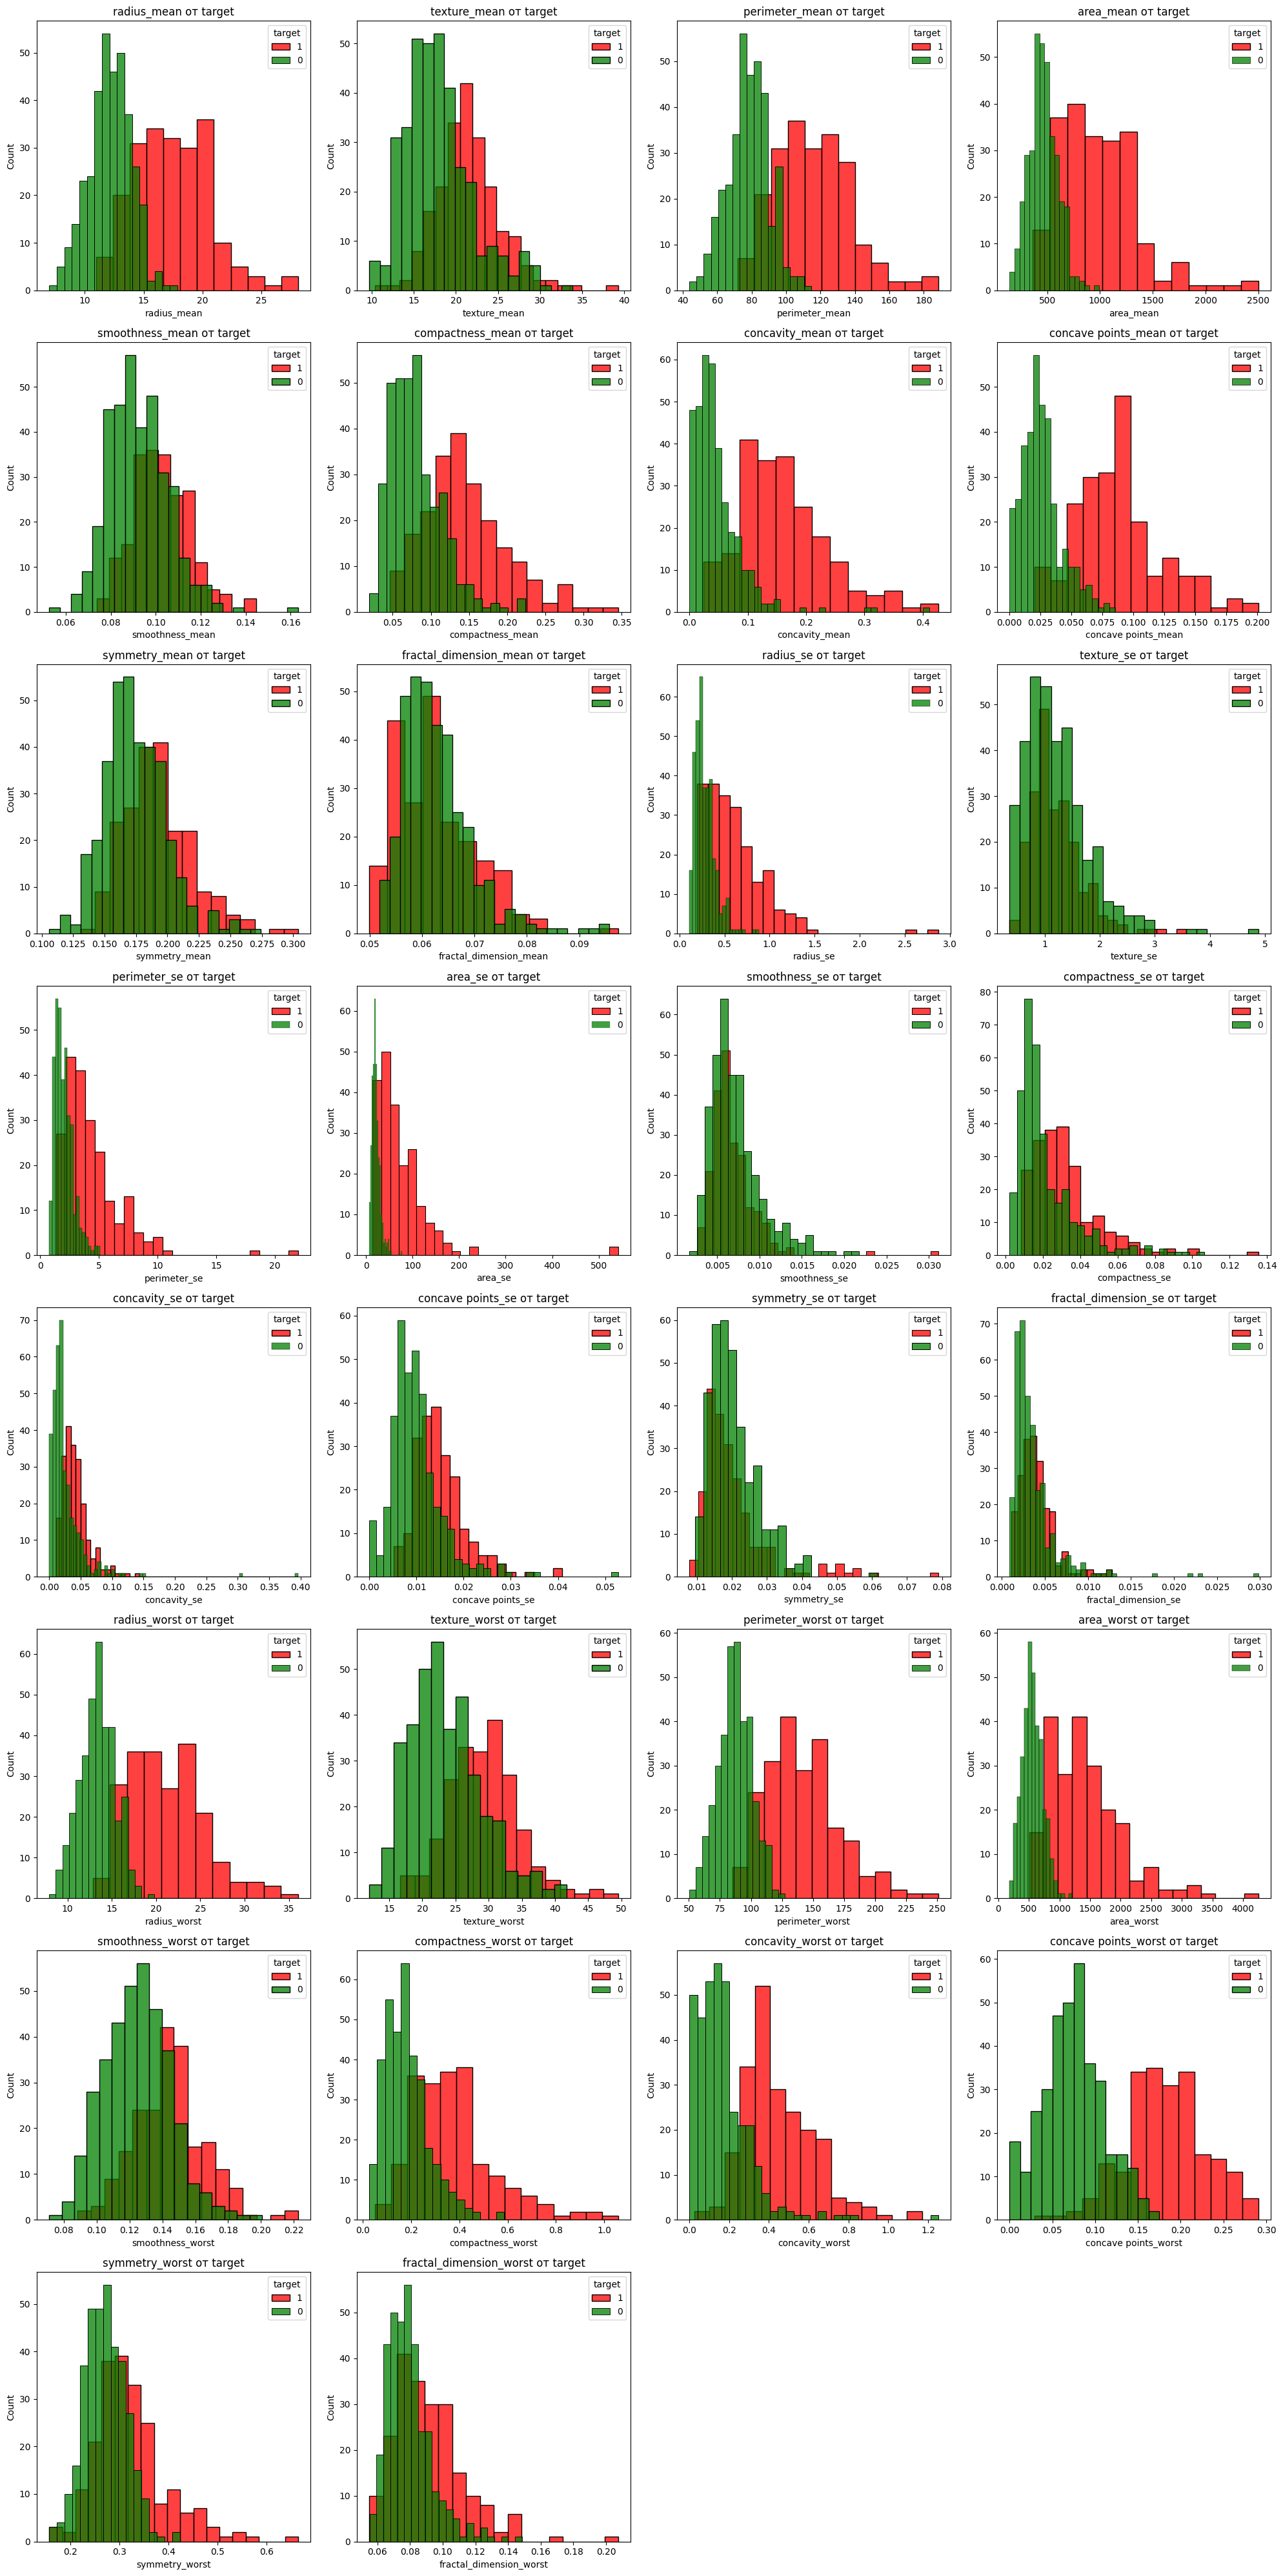

In [47]:
target = 'target'
features = df.columns.drop(target)

colors = {0: 'green', 1: 'red'}

num_cols = 4  # Устанавливаем количество столбцов

num_rows = (len(features) - 1) // num_cols + 1  # Вычисляем количество строк

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

for idx, feature in enumerate(features):
    ax = axes[idx // num_cols, idx % num_cols]  # Получаем правильную подобласть в зависимости от индекса
    for category in df[target].unique():
        sns.histplot(df[df[target]==category][feature], kde=False, label=category, color=colors.get(category), ax=ax)
    ax.legend(title=target)
    ax.set_title(f'{feature} от {target}')

# Удаляем лишние подобласти
for i in range(len(features), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

<b>Исходя из построенных графиков, можно сделать следующие выводы:</b>
</br>1. Для признаков  <b>'radius_mean'</b>, <b>'perimeter_mean'</b>, <b>'area_mean'</b>, <b>'compactness_mean'</b>,
 <b>'concavity_mean'</b>, <b>'concave points_mean'</b>, <b>'radius_se'</b>, <b>'perimeter_se'</b>,
 <b>'area_se'</b>, <b>'radius_worst'</b>, <b>'perimeter_worst'</b>, <b>'area_worst'</b>, <b>'compactness_worst'</b>,
 <b>'concavity_worst'</b>, <b>'concave points_worst'</b>, распределения классов 0 и 1 сильно отличаются.
Это говорит о том, что данный признак может иметь важное значение для классификации.
</br>2. Для признаков  <b>'texture_mean'</b>, <b>'compactness_se'</b>, <b>'concavity_se'</b>, <b>'concave points_se'</b>,
 <b>'texture_worst'</b>, <b>'smoothness_worst'</b>, <b>'symmetry_worst'</b>, <b>'fractal_dimension_worst'</b>
распределения классов 0 и 1 отличаются не сильно, но есть небольшие расхождения.
Такие признаки остаются под вопросом, имеют ли они важное значение для классификации.
</br>3. Для признаков  <b>'smoothness_mean'</b>, <b>'symmetry_mean'</b>, <b>'fractal_dimension_mean'</b>,
 <b>'texture_se'</b>, <b>'smoothness_se'</b>, <b>'symmetry_se'</b>, <b>'fractal_dimension_se'</b>,
распределения классов 0 и 1 более схожи.
Это может указывать на то, что данный признак может быть менее информативным для разделения классов.

Таким образом, анализ различий в распределениях признаков относительно целевой переменной позволяет понять,
какие признаки могут играть важную роль в классификации объектов, а также определить их предполагаемую значимость.

| <font color="red">Важно   | <font color="orange">Под вопросом  | <font color="green">Не важно |
| :-                        | :-                                 | :-                           |
| radius_mean               | texture_mean                       | smoothness_mean
| perimeter_mean            | compactness_se                     | symmetry_mean
| area_mean                 | concavity_se                       | fractal_dimension_mean
| compactness_mean          | concave points_se                  | texture_se
| concavity_mean            | texture_worst                      | smoothness_se
| concave points_mean       | smoothness_worst                   | symmetry_se
| radius_se                 | symmetry_worst                     | fractal_dimension_se
| perimeter_se              | fractal_dimension_worst            |
| area_se                   |                                    |
| radius_worst              |                                    |
| perimeter_worst           |                                    |
| area_worst                |                                    |
| compactness_worst         |                                    |
| concavity_worst           |                                    |
| concave points_worst      |                                    |

13. Посмотрим на корреляцию признаков с целевой переменной и между собой.
Построим heatmap для матрицы корреляций.
</br>Ответим на вопросы: Есть ли признаки, которые сильно скоррелированы? Какие это признаки?

<b>Корреляция</b> - это статистическая мера, которая описывает взаимосвязь или взаимозависимость между двумя переменными.
Если две переменные коррелируют, это означает, что изменения одной переменной сопровождаются изменениями другой переменной.
</br><b>Корреляция положительная</b>, если увеличение значения одной переменной связано с увеличением значения другой, и <b>отрицательная</b>, если увеличение значения одной переменной связано с уменьшением значения другой. Коэффициент корреляции измеряет силу и направление этой взаимосвязи.
</br>Зачем нужно изучать корреляцию? В реальном мире многие явления и процессы взаимосвязаны. Например, количество выпитого кофе может быть связано с уровнем бодрствования. Изучение корреляции помогает понять природу этих связей, предсказывать поведение переменных, исследовать влияние факторов друг на друга, а также строить модели, основанные на этих зависимостях.
</br>Таким образом, изучение корреляции позволяет установить связь между переменными, выявить закономерности, предсказать тенденции и принимать обоснованные решения на основе статистических данных.

In [48]:
df.corr()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Визуализируем данные.

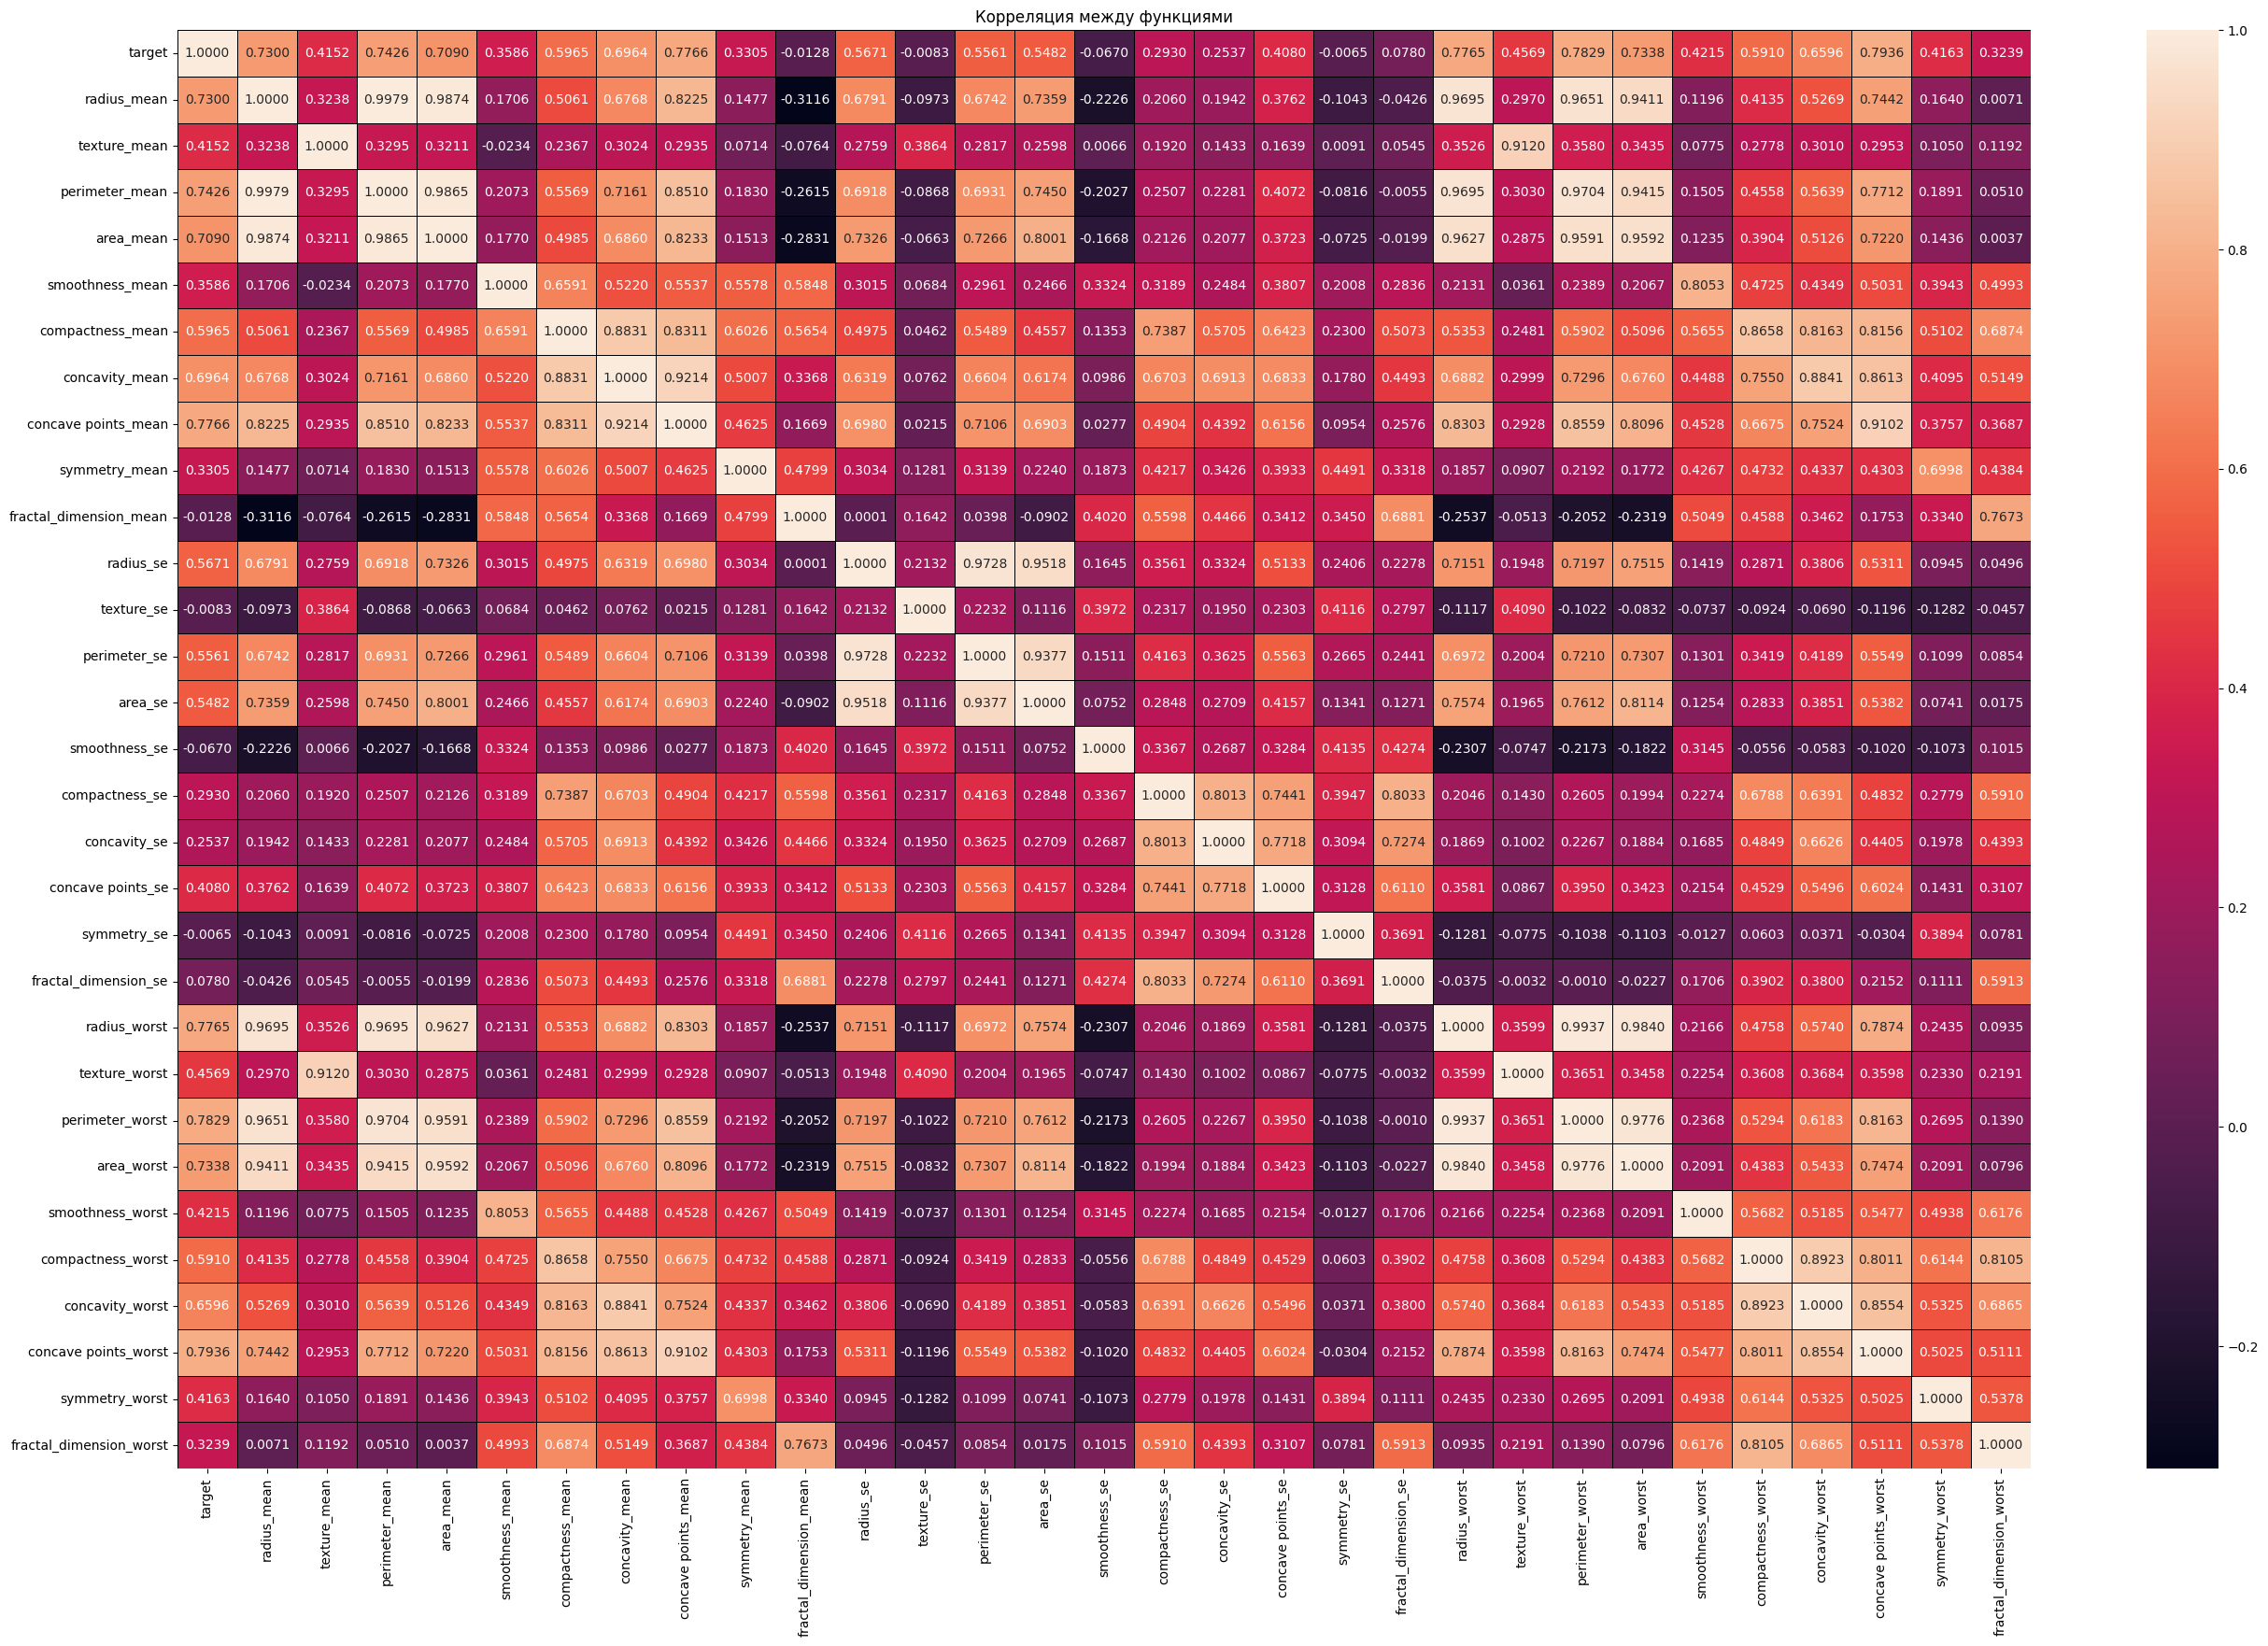

In [49]:
# Создаём фигуру (Figure) и набор осей (Axes), указанный как f и ax соответственно.
# Опция figsize = (32, 20) задает размер новой фигуры, в данном случае, шириной 32 дюйма и высотой 20 дюймов.
f, ax = plt.subplots(figsize = (32,20)) 
sns.heatmap(df.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.title("Корреляция между функциями")
plt.show()

Значения на графике плохо читаются, выведем текстовую информацию по признакам, коррелиррующим с целевой переменной.

In [50]:
df.corr()["target"].sort_values(ascending=False)

target                     1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Видим, что есть признаки, которые сильно скоррелированы. Отберём признаки с корреляцией выше 0,75.

In [67]:
corr_matrix = df.corr()

# устанавливаем порог корреляции.
# выбираем только те признаки, корреляция между которыми превышает заданный порог.
threshold = 0.75

# создаём фильтр filtre, который содержит логические значения True и False в зависимости от того,
# превышает ли абсолютное значение корреляции между каждым признаком и целевой переменной установленный порог.
filtre = np.abs(corr_matrix["target"]) > threshold

# выбираем имена столбцов, удовлетворяющие условию, т.е. признаки, корреляция которых превышает установленный порог.
corr_matrix.columns[filtre]

# имена выбранных признаков сохраняем в списке corr_features.
corr_features = corr_matrix.columns[filtre].tolist() 
corr_features

['target',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst']

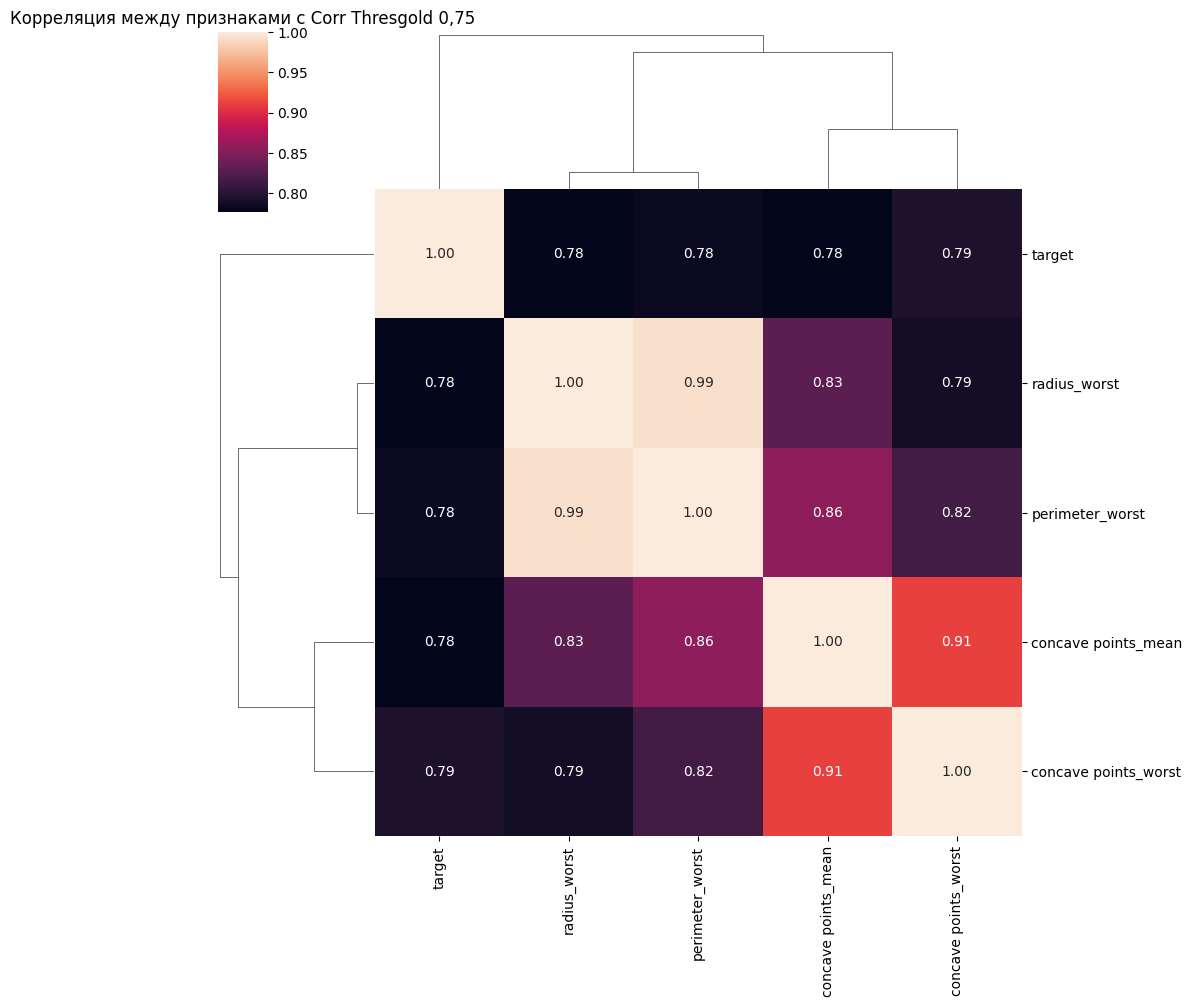

In [58]:
# Этот код строит "кластерную карту" для признаков, выбранных на предыдущем шаге.
# Используется библиотека seaborn, которая визуализирует корреляцию между этими признаками.
# При этом числовые значения корреляции отображаются как аннотации на карте кластеров с точностью до двух знаков после запятой.
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Корреляция между признаками с Corr Thresgold 0,75")
plt.show()

Выбор данных для обучения модели зависит от конкретной задачи и метода моделирования. В общем случае, разнообразие данных играет важную роль при построении модели, поскольку позволяет модели лучше обобщать информацию и делать более точные предсказания.

Если данные сильно скоррелированы, то это может привести к проблемам в некоторых методах моделирования, таких как линейная регрессия, где мультиколлинеарность может вносить шум в модель и затруднять интерпретацию влияния признаков. В этом случае, может потребоваться применение методов для устранения мультиколлинеарности, например, методов отбора признаков или методов снижения размерности, таких как метод главных компонент (PCA).

С другой стороны, слабоскоррелированные данные могут иметь меньшую информативность и предсказательную силу. Однако, в некоторых моделях, таких как нейронные сети, различные признаки могут вносить разнообразие информации, что может быть полезно для обучения.

Определение оптимального набора признаков для обучения модели обычно требует анализа и экспериментов. Можно использовать методы анализа корреляции, отбора признаков, визуализации данных и экспериментов с различными наборами признаков для нахождения оптимального баланса между разнообразием данных и избеганием излишней корреляции.

14. Построим для сильно скоррелированных признаков попарные scatterplot-ы.
Ответим на вопрос - действительно ли наблюдается линейная зависимость?

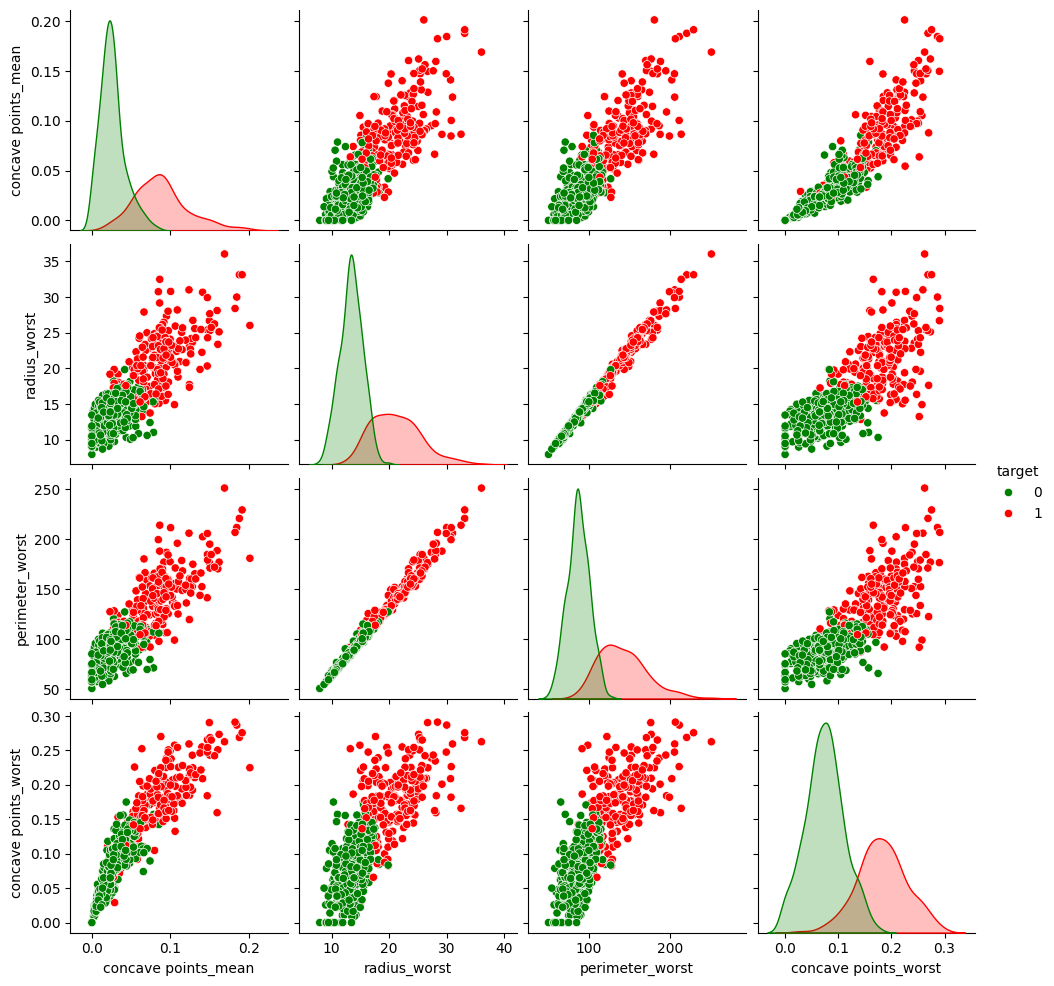

In [62]:
# Установка пользовательских цветов для целевой переменной
custom_palette = {0: "green", 1: "red"}

# Строим попарные графики рассеяния с пользовательскими цветами
sns.pairplot(df[corr_features], diag_kind="kde", hue="target", palette=custom_palette)
plt.show()

In [64]:
# Создайте список для признаков с линейной зависимостью
linearly_dependent_features = []

# Порог для определения сильной линейной зависимости
linear_threshold = 0.75

# Найдём признаки с линейной зависимостью от целевой переменной
for feature in corr_matrix.columns:
    if feature == "target":
        continue  # Пропустить целевую переменную
    correlation = np.abs(corr_matrix.loc[feature, "target"])
    if correlation > linear_threshold:
        linearly_dependent_features.append(feature)

print("Признаки с линейной зависимостью от целевой переменной:", linearly_dependent_features)

Признаки с линейной зависимостью от целевой переменной: ['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']


Таким образом признаки с линейной зависимостью от целевой переменной:
* concave points_mean,
* radius_worst,
* perimeter_worst,
* concave points_worst.

15. Используя boxplots и группировку по целевой переменной,
попробуем предположить, по каким признакам наиболее удобно было бы отделить один класс от другого.

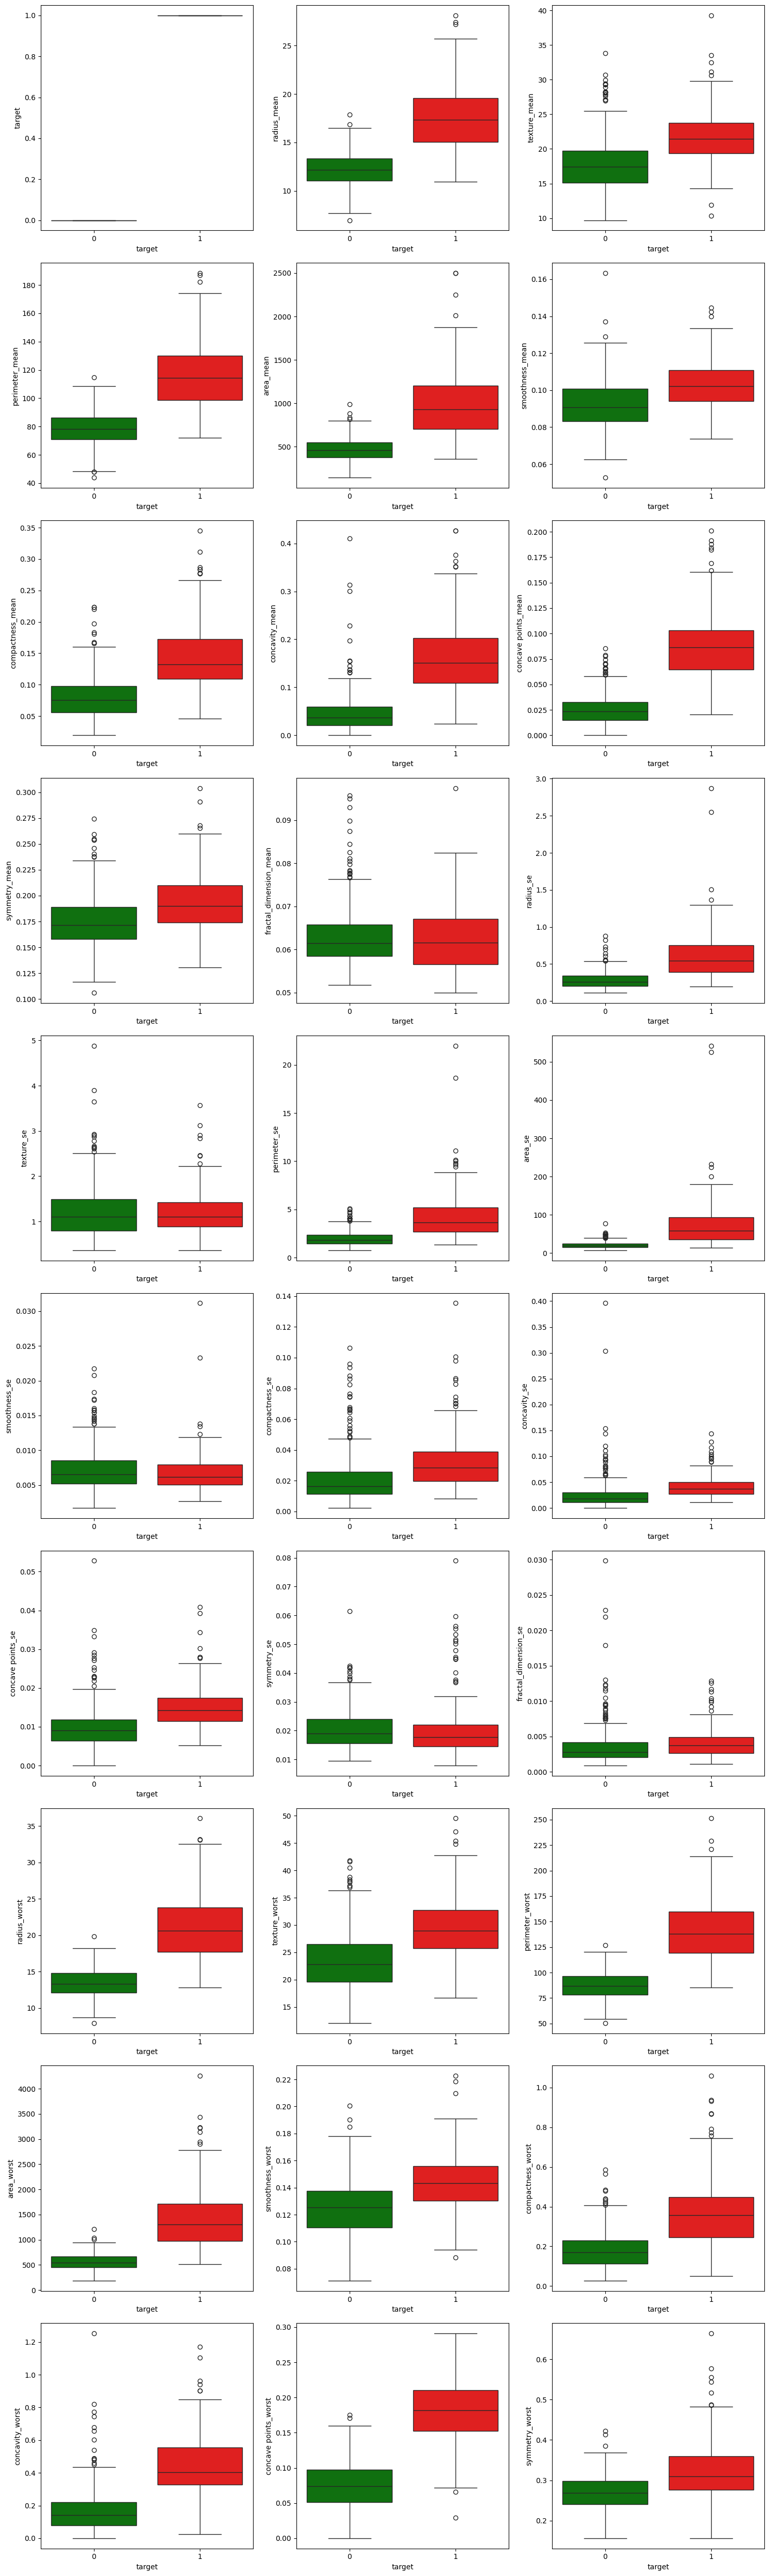

In [78]:
# Вычисляем количество столбцов
num_columns = len(df.columns) - 1  # Исключаем целевую переменную 

# Вычисляем количество строк и столбцов для сетки графиков
num_rows = (num_columns - 1) // 3 + 1  # При условии 3 столбца в строке
num_cols = 3

# Устанавливаем размер графика
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Создайте цветовую палитру
colors = sns.color_palette(["green", "red"])

# Строим boxplot'ы с группировкой по целевой переменной

# i // num_cols - строка, i % num_cols - столбец
for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(x='target', y=column, data=df, ax=axes[i // num_cols, i % num_cols], palette=colors, hue='target', legend=False)

# Убираем ненужные подграфики, если остались сверху
for j in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Отображаем графики
plt.tight_layout()
plt.show()

<b>Исходя из построенных графиков, можно сделать следующие выводы:</b>
</br>1. Для признаков  <b>'radius_mean'</b>, <b>'perimeter_mean'</b>, <b>'area_mean'</b>, <b>'compactness_mean'</b>,
 <b>'concavity_mean'</b>, <b>'concave points_mean'</b>, <b>'radius_se'</b>, <b>'perimeter_se'</b>,
 <b>'area_se'</b>, <b>'radius_worst'</b>, <b>'perimeter_worst'</b>, <b>'area_worst'</b>, <b>'compactness_worst'</b>,
 <b>'concavity_worst'</b>, <b>'concave points_worst'</b>, распределения классов 0 и 1 сильно отличаются.
Это говорит о том, что данный признак может иметь важное значение для классификации.
</br>2. Для признаков  <b>'texture_mean'</b>, <b>'compactness_se'</b>, <b>'concavity_se'</b>, <b>'concave points_se'</b>,
 <b>'texture_worst'</b>, <b>'smoothness_worst'</b>, <b>'symmetry_worst'</b>, <b>'fractal_dimension_worst'</b>
распределения классов 0 и 1 отличаются не сильно, но есть небольшие расхождения.
Такие признаки остаются под вопросом, имеют ли они важное значение для классификации.
</br>3. Для признаков  <b>'smoothness_mean'</b>, <b>'symmetry_mean'</b>, <b>'fractal_dimension_mean'</b>,
 <b>'texture_se'</b>, <b>'smoothness_se'</b>, <b>'symmetry_se'</b>, <b>'fractal_dimension_se'</b>,
распределения классов 0 и 1 более схожи.
Это может указывать на то, что данный признак может быть менее информативным для разделения классов.

Таким образом, анализ различий в распределениях признаков относительно целевой переменной позволяет понять,
какие признаки могут играть важную роль в классификации объектов, а также определить их предполагаемую значимость.

# Часть 2. Моделирование при помощи kNN

Импортируем библиотеки.

In [109]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

1. Разобъём данные на train-test, отложив 30% выборки для тестирования.

In [84]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('target', axis=1)  # Признаки
y = df['target']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки с равными пропорциями для обоих классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [107]:
y_train.value_counts(normalize=True)

target
0    0.628141
1    0.371859
Name: proportion, dtype: float64

In [108]:
y_test.value_counts(normalize=True)

target
0    0.625731
1    0.374269
Name: proportion, dtype: float64

В этом коде train_test_split используется с параметром stratify=y,
который позволяет учитывать баланс классов целевой переменной при разделении выборки.
После выполнения этого кода данные будут разделены на обучающую и тестовую выборки в соотношении 70/30,
причём каждый класс будет представлен в тестовой выборке в равной пропорции.

2. Поясним, почему здесь нужна стандартизация (нормализация) данных.
Приведём все непрерывные переменные к одному масштабу при помощи стандартизации.

Стандартизация данных необходима при использовании алгоритмов, которые требуют числовой стабильности,
таких как метод ближайших соседей (kNN) или метод опорных векторов (SVM).
В этих алгоритмах расстояние между точками имеет значение,
и стандартизация помогает сделать масштаб признаков одинаковым.

In [87]:
# выполняем стандартизацию обучающих данных с использованием класса StandardScaler из библиотеки scikit-learn.
# создаём экземпляр класса StandardScaler и сохраняем его в переменной scaler.
# этот объект будет использоваться для стандартизации данных.
scaler = StandardScaler()

# выполняем стандартизацию обучающих данных.
# метод fit_transform сначала подгоняет scaler к данным X_train, вычисляя среднее и стандартное отклонение каждого признака,
# и затем выполняет стандартизацию путем вычитания среднего и деления на стандартное отклонение для каждого признака в X_train.
X_train = scaler.fit_transform(X_train)

# в методе transform() класса StandardScaler вычисляются значения среднего и стандартного отклонения признаков
# на основе обучающих данных, а затем применяются к тестовым данным для стандартизации.
# это важно, потому что стандартизация должна быть выполнена с использованием параметров,
# вычисленных на обучающих данных, чтобы гарантировать сопоставимость преобразований между обучающими и тестовыми данными.
# Если бы стандартизация была выполнена на тестовых данных отдельно от обучающих,
# это могло бы привести к неправильной интерпретации и сравнению результатов модели на тестовых данных.

X_test = scaler.transform(X_test)

После выполнения этого кода:
* <b>X_train</b> будет содержать стандартизированные значения обучающих данных,
которые могут быть использованы для обучения моделей машинного обучения.
Стандартизация данных помогает алгоритмам машинного обучения более эффективно работать,
особенно в случае алгоритмов, которые основаны на расстояниях между признаками,
таких как метод ближайших соседей или метрические методы.
* <b>X_train</b> будет содержать стандартизированные значения тестовых данных,
подготовленные для использования в модели машинного обучения, которая была обучена на стандартизированных обучающих данных.

Поместим стандартизированные данные в новый датасет.

In [116]:
# создаём переменную x, которая содержит копию датасета df без столбца "target"
df_new = df.drop(["target"] , axis = 1)

# создаём список columns, который содержит имена столбцов из датасета x
columns = df_new.columns.tolist()

# создаём новый датасет X_train_df из массива X_train с использованием имеён столбцов из списка columns,
# это позволяет преобразовать массив X_train в объект датасет и установить правильные имена столбцов.
X_train_df = pd.DataFrame(X_train , columns = columns)
X_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.705820,1.049745,2.121295,1.669337,2.276458,4.544295,3.539139,2.848393,4.032390,2.639773,1.886582,1.200053,2.872750,1.749217,1.197773,2.415587,2.324706,2.297848,6.944769,0.827408,1.459510,0.949589,1.868176,1.306840,1.335383,2.313855,2.346427,2.049399,3.944281,0.866554
1,0.536388,-0.909945,0.569095,0.390316,-0.065868,0.644945,0.393543,0.557002,-0.116781,-0.401530,-0.250414,-0.844424,-0.118574,-0.161492,-0.376146,0.408546,0.147716,0.481655,-0.682439,-0.238099,0.508294,-0.645315,0.501917,0.330087,0.477013,1.242091,1.052574,1.255850,0.167978,0.405242
2,-0.131456,-0.993336,-0.148848,-0.211543,-0.916169,-0.508574,-0.567530,-0.606645,-0.079867,-0.512454,-0.958073,-1.214530,-0.877833,-0.665315,-0.593465,0.262631,-0.237152,-0.516771,-0.265956,0.411392,-0.362451,-1.028485,-0.280415,-0.399387,-0.196219,0.368661,-0.080795,-0.140014,0.741988,0.687521
3,0.928077,1.418055,0.925405,0.828546,0.329734,0.223748,0.983188,0.443947,-1.866520,-0.555982,0.441432,0.808198,0.446896,0.419099,8.389757,3.377178,3.374623,4.434358,0.157646,3.271083,0.365921,0.351910,0.386082,0.243539,-0.330866,-0.464721,0.030311,-0.072253,-2.040715,-0.861167
4,0.144699,-0.972488,0.158315,-0.009697,1.205760,0.585041,0.137701,0.562858,1.116158,0.117991,0.376381,-0.863118,0.470250,0.056632,-0.490871,1.060974,0.365869,0.744314,0.456659,0.401354,0.008957,-1.257732,0.059367,-0.140450,-0.187804,0.359126,-0.064176,0.376471,0.373873,0.047726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.308984,-0.235867,-0.380654,-0.372341,-0.419059,-1.216560,-0.775633,-0.491553,-1.279582,-0.560194,-0.801015,2.021511,-0.843548,-0.600728,-0.891542,-1.131732,-0.569979,0.009189,0.746180,-0.737764,-0.618310,-0.509404,-0.681382,-0.595621,-1.479147,-1.310881,-1.071103,-0.972261,-1.441748,-1.217585
394,-0.630226,0.401148,-0.635395,-0.627126,0.130195,-0.401496,-0.776496,-0.680996,0.758089,0.039361,-0.474680,-0.025842,-0.465905,-0.477301,1.029671,0.301206,-0.483142,-0.369425,0.256130,-0.553735,-0.669894,0.211087,-0.662671,-0.636245,0.439143,-0.214262,-0.747901,-0.482881,0.255327,-0.568454
395,-0.317438,1.318449,-0.380654,-0.382533,-0.845948,-0.971891,-0.942904,-0.787176,-0.541296,-1.141496,-0.519964,0.026285,-0.601558,-0.439146,-0.301626,-0.903913,-0.804441,-0.840290,-0.981452,-0.835541,-0.403719,0.975789,-0.485354,-0.449726,-0.436058,-0.909700,-1.088718,-0.835536,-0.944168,-1.150585
396,0.020711,0.252897,0.020706,-0.104534,-0.455213,0.152612,-0.467117,-0.457179,-1.135616,-0.355194,-0.211958,-0.358380,-0.058946,-0.213437,-0.976460,0.432586,-0.122781,0.307083,-0.512761,-0.378258,0.031654,0.219274,0.139561,-0.096470,-0.709559,0.575258,-0.107859,0.289135,-0.588531,-0.290019


Посмотрим на базовые статистики нового датасета.

In [117]:
X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,398.000000,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,4.463208e-17,-4.407418e-16,7.933352e-16,5.355850e-17,-1.640229e-16,-9.149577e-17,-1.272014e-16,-6.694812e-18,1.544270e-15,1.376900e-15,0.000000,-2.231604e-16,4.463208e-18,-1.785283e-17,-2.856453e-16,-1.383595e-16,6.248491e-17,2.666767e-16,-3.213510e-16,-1.785283e-17,-1.762967e-16,-3.927623e-16,2.588661e-16,-2.689083e-16,-2.008444e-17,1.762967e-16,-1.171592e-16,-1.294330e-16,-3.436670e-16,1.205066e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.013537e+00,-2.253467e+00,-1.970532e+00,-1.448950e+00,-2.318505e+00,-1.558759e+00,-1.091673e+00,-1.235829e+00,-2.781996e+00,-1.738242e+00,-1.061221,-1.540776e+00,-1.048766e+00,-7.698486e-01,-1.806224e+00,-1.279716e+00,-9.763304e-01,-1.855052e+00,-1.487876e+00,-1.065743e+00,-1.726343e+00,-2.276243e+00,-1.692711e+00,-1.232718e+00,-2.566417e+00,-1.431025e+00,-1.300578e+00,-1.727112e+00,-2.099988e+00,-1.582789e+00
25%,-6.915154e-01,-7.199985e-01,-6.920156e-01,-6.762432e-01,-7.487855e-01,-7.485627e-01,-7.277702e-01,-7.349135e-01,-7.046417e-01,-7.209646e-01,-0.628413,-6.986920e-01,-6.317449e-01,-5.178110e-01,-6.046427e-01,-6.828870e-01,-5.305695e-01,-6.526249e-01,-6.417990e-01,-5.737182e-01,-6.843381e-01,-7.120419e-01,-6.973469e-01,-6.520976e-01,-7.337530e-01,-6.926140e-01,-7.438647e-01,-7.582515e-01,-6.244066e-01,-6.988840e-01
50%,-2.174023e-01,-9.456572e-02,-2.268678e-01,-3.017091e-01,-4.918168e-02,-2.190710e-01,-3.559730e-01,-3.879201e-01,-5.771806e-02,-1.909131e-01,-0.314926,-1.939088e-01,-2.795686e-01,-3.605389e-01,-2.187884e-01,-2.986700e-01,-1.934311e-01,-1.149340e-01,-2.048483e-01,-2.412587e-01,-2.726944e-01,-7.219717e-02,-2.870980e-01,-3.507260e-01,-4.474223e-02,-2.578059e-01,-2.132661e-01,-2.299842e-01,-1.424249e-01,-2.084663e-01
75%,4.807344e-01,5.615596e-01,5.025431e-01,3.828843e-01,6.234809e-01,5.036098e-01,5.372531e-01,5.613941e-01,5.144540e-01,4.876231e-01,0.274581,4.675715e-01,2.476398e-01,1.171960e-01,4.063944e-01,3.635417e-01,2.740391e-01,4.203946e-01,2.949902e-01,2.627748e-01,5.892812e-01,7.125645e-01,5.702295e-01,4.241411e-01,6.095551e-01,5.342567e-01,5.317085e-01,7.190373e-01,4.269063e-01,4.395662e-01
max,3.940421e+00,4.596180e+00,3.956084e+00,5.219342e+00,4.695957e+00,4.544295e+00,4.173193e+00,3.887272e+00,4.032390e+00,4.889157e+00,8.863626,6.592556e+00,9.496894e+00,1.115452e+01,8.389757e+00,4.542827e+00,1.100543e+01,6.599696e+00,6.944769e+00,9.695349e+00,3.473366e+00,3.867576e+00,3.620551e+00,4.502041e+00,3.805303e+00,5.121037e+00,4.644026e+00,2.654725e+00,5.812935e+00,6.790010e+00


Рассмотрим, что можно увидеть в результате вызова X_train_df.describe(),
если данные были стандартизированы с использованием метода среднего и стандартного отклонения:
* <b>Средние значения mean:</b>
    В стандартизированных данных средние значения для всех переменных должны быть близки к нулю.
    Видим, что параметр mean у всех признаков от ...e-17 (то есть близко к нулю) до нуля.
* <b>Стандартное отклонение std:</b>
    Для стандартизированных данных стандартное отклонение для каждой переменной должно быть приблизительно равно 1.
    Видим, что параметр std от у всех признаков от ...e+00 (то есть близко к единице) до 1.001259.

Делаем вывод, что данные стандартизированы.

3. Построим модель kNN "из коробки" без настройки параметров.
Оценим метрики качества бинарной классификации (accuracy, precision, recall, f1_score),
Построим ROC-кривую и посчитаем площадь под ней.

In [118]:
# Создание модели k-ближайших соседей
knn_model = KNeighborsClassifier()

# Обучение модели на обучающем наборе
knn_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn_model.predict(X_test)

# Оценка метрик качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Построение ROC-кривой и вычисление площади под кривой (AUC)
y_score = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Вывод результатов
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUC:", roc_auc)

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.90625
F1 score: 0.9508196721311475
AUC: 0.9881717289719626


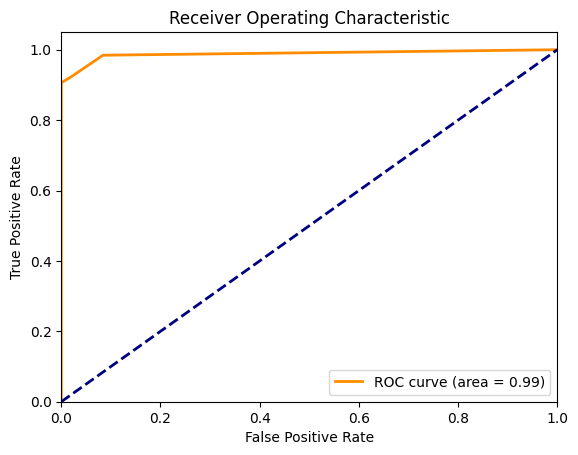

In [119]:
# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

4. Теперь проведём настройку параметра числа соседей на кросс-валидации и снова оценим результат.
Ответим на вопрос - стало ли лучше?

Применим технику GridSearch на кросс-валидации.
Выполним настройку гиперпараметров модели k-ближайших соседей посредством перебора различных значений параметра числа соседей,
а затем нахождения "лучших" параметров и оценки модели с их использованием.

In [128]:
# создаём словарь параметров, который содержит значения, используемые для настройки числа соседей (n_neighbors),
# эти значения будут перебираться в процессе поиска лучших параметров.
parameters = {'n_neighbors':[1, 2, 5, 10, 15, 20, 30, 40, 50, 75, 100]}

# создаём объект модели k-ближайших соседей (kNN),
# на данном этапе модель используется с параметрами по умолчанию, перед настройкой.
knn = KNeighborsClassifier()

# создаём объект GridSearchCV, который выполняет поиск лучшего набора параметров для модели с использованием кросс-валидации.
# в данном случае используется модель k-ближайших соседей (knn), набор параметров (parameters),
# 5-кратная кросс-валидация (cv=5) и метрика качества 'accuracy'.
grid_search = GridSearchCV(knn, parameters,cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# Получение оптимального числа соседей
best_k = grid_search.best_params_['n_neighbors']

# Создание модели с оптимальным числом соседей
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Обучение модели с оптимальным числом соседей
best_knn_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_best = best_knn_model.predict(X_test)

# Оценка метрик качества для модели с оптимальным числом соседей
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Построение ROC-кривой и вычисление площади под кривой (AUC)
y_score = best_knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Вывод результатов
print("Оптимальное число соседей:", best_k)
print("Accuracy для модели с оптимальным числом соседей:", accuracy_best)
print("Precision для модели с оптимальным числом соседей:", precision_best)
print("Recall для модели с оптимальным числом соседей:", recall_best)
print("F1 score для модели с оптимальным числом соседей:", f1_best)
print("AUC для модели с оптимальным числом соседей:", roc_auc)

Оптимальное число соседей: 5
Accuracy для модели с оптимальным числом соседей: 0.9649122807017544
Precision для модели с оптимальным числом соседей: 1.0
Recall для модели с оптимальным числом соседей: 0.90625
F1 score для модели с оптимальным числом соседей: 0.9508196721311475
AUC для модели с оптимальным числом соседей: 0.9881717289719626


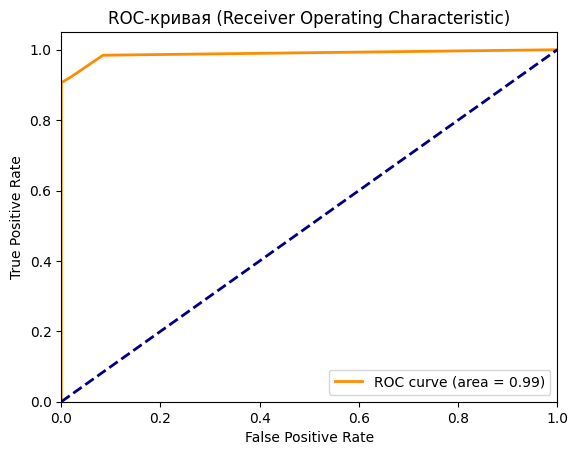

In [129]:
# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

Сделаем сравнительную таблицу было/стало:

|Параметр      | Было                      | Стало                              | Разница                      |
| :-           | :-                        | :-                                 | :-                           |
| Accuracy     | 0.9649122807017544        | 0.9649122807017544                 | 0                            |
| Precision    | 1.0                       | 1.0                                | 0                            |
| Recall       | 0.90625                   | 0.90625                            | 0                            |
| F1 score     | 0.9508196721311475        | 0.9508196721311475                 | 0                            |
| AUC          | 0.9881717289719626        | 0.9881717289719626                 | 0                            |


По получившимся результатам видим, что нет разницы в результатах выполнения кода,
который выполняет задачу оценки метрик качества и построения ROC-кривой
для модели k-ближайших соседей (kNN) "из коробки" без настройки параметров
и выполнением кода, в котором мы выполнили настройку параметра числа соседей на кросс-валидации.